In [35]:
import json
import subprocess

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from dj_config.settings import BASE_DIR

In [36]:
"""Verify the installation"""

print(f"tf = {tf.__version__} | tfds = {tfds.__version__}")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))

tf = 2.15.0 | tfds = 4.9.4
tf.Tensor(-78.6428, shape=(), dtype=float32)
[]


In [64]:
"""Define functions to graph the full set of 10 class predictions."""


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

In [38]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
"""load x_test_combo data"""

saved_x_test = "x_test_2024_02_07_00_40"
x_test_path = f"{BASE_DIR}/ml_data/{saved_x_test}.json"

command_str = f"xz -d {x_test_path}.xz"

subprocess.run(
    command_str.split(" "),
    capture_output=True,
    check=True,
    encoding="utf-8",
)

with open(x_test_path, "r") as report_file:
    x_test_data = json.load(report_file)

command_str = f"xz {x_test_path}"

subprocess.run(
    command_str.split(" "),
    capture_output=True,
    check=True,
    encoding="utf-8",
)

x_test = np.array(x_test_data)
x_test.shape

(20000, 28, 28)

In [119]:
"""Loading the model """

saved_model = "trained_mnist_2024_02_06_20_36"
model_save_path = f"{BASE_DIR}/ml_data/{saved_model}.keras"

model = keras.models.load_model(model_save_path)

In [120]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

625/625 [==============================] - 0s 488us/step


In [121]:
"""Load board data"""

board_name = "easy_34"
board_data_path = f"{BASE_DIR}/ml_data/board_data_{board_name}.json"

with open(board_data_path, "r") as report_file:
    _board_data = json.load(report_file)

board_data = np.array(_board_data)
board_data.shape

(9, 28, 28)

In [122]:
"""predict board numbers"""

prediction_numbers = []
for board_number in board_data:
    if np.count_nonzero(board_number) == 0:
        prediction_numbers.append(0)
        continue

    img_to_predict = np.expand_dims(board_number, axis=0)
    # print(f"{img_to_predict.shape = }")

    predictions_single = probability_model.predict(img_to_predict)
    prediction_number = np.argmax(predictions_single[0])
    # print(f"{prediction_number = }")
    prediction_numbers.append(prediction_number)

1/1 [==============================] - 0s 11ms/step


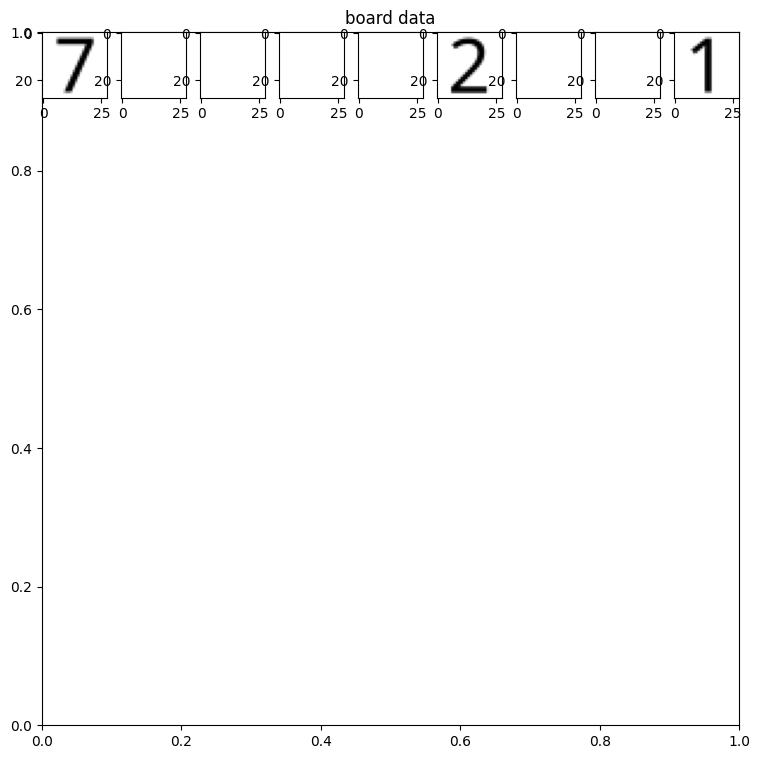

In [123]:
plt.show()
plt.figure(figsize=(9, 9))
plt.title("board data")
for count, number_data in enumerate(board_data):
    plt.subplot(9, 9, count + 1)
    plt.imshow(number_data, cmap=plt.cm.binary)
plt.show()

In [124]:
tf_numbers = np.array(prediction_numbers)
tf_numbers.reshape((9, 1))
tf_numbers

array([2, 0, 0, 0, 0, 2, 0, 0, 3])

1/1 [==============================] - 0s 10ms/step


IndexError: index 9 is out of bounds for axis 0 with size 9

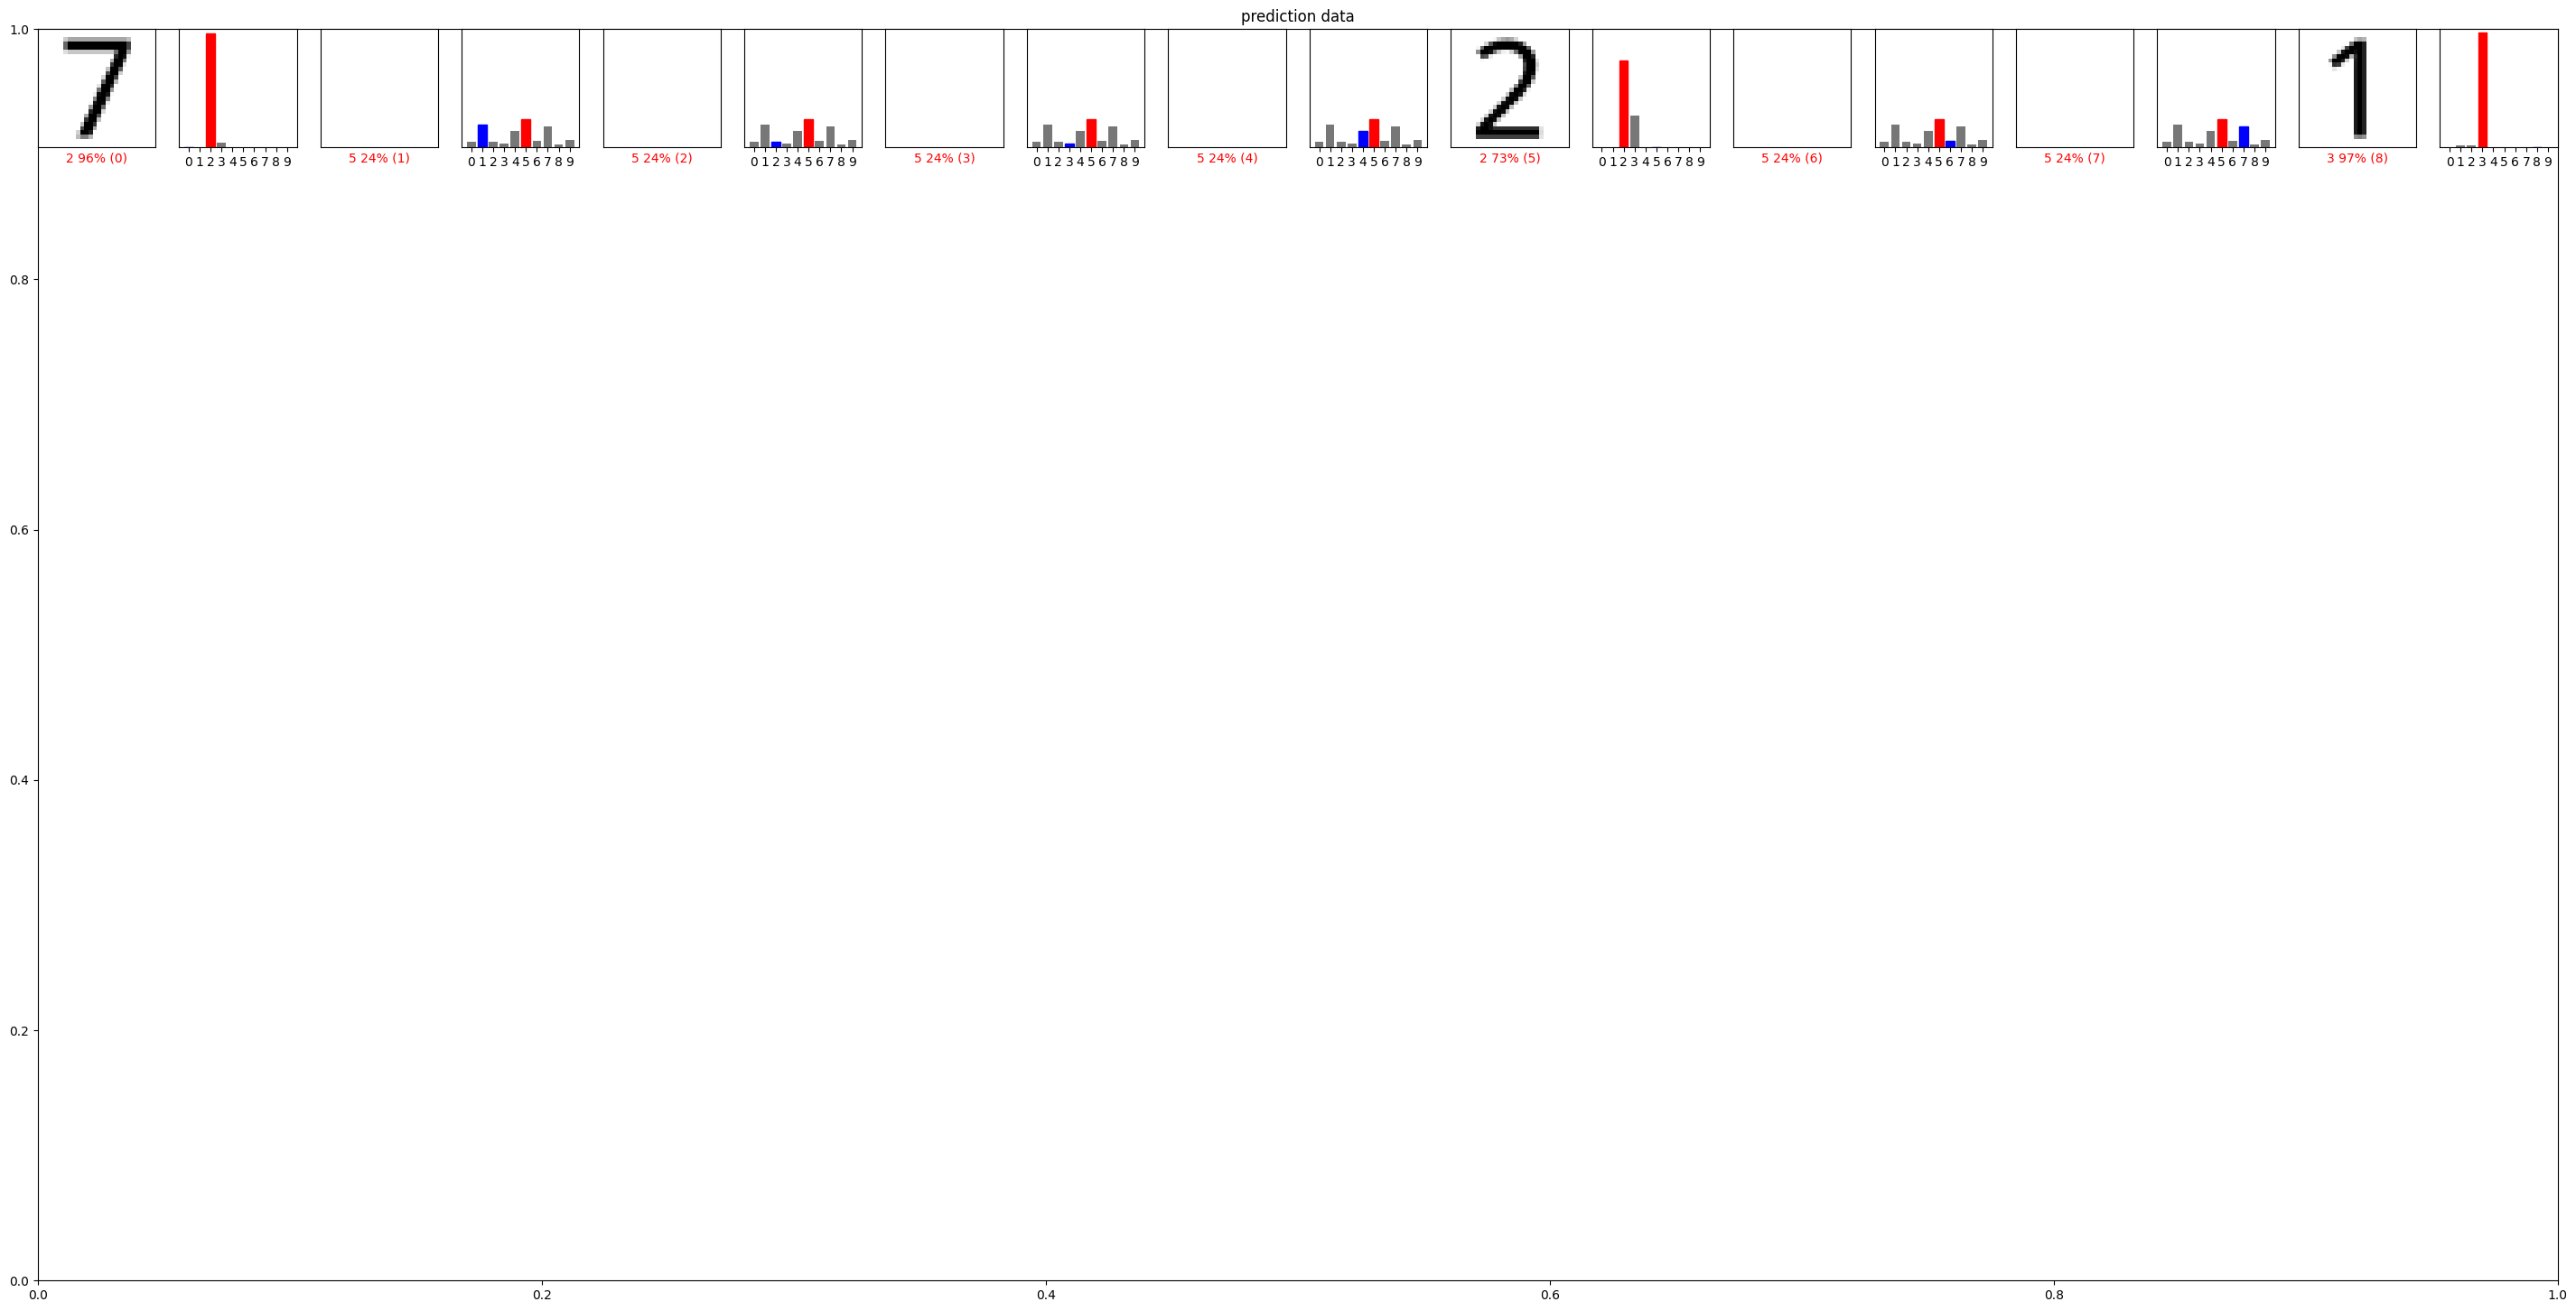

In [125]:
num_rows = 9
num_cols = 9
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
plt.title("prediction data")
for i in range(num_images):

    img_to_predict = np.expand_dims(board_data[i], axis=0)
    predictions_single = probability_model.predict(img_to_predict)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_single[0], labels, board_data)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_single[0], labels)
plt.tight_layout()
plt.show()

In [ ]:
"""single test"""

number_position = 4

test_number = np.expand_dims(board_data[number_position], axis=0)
print(f"{test_number.shape = }")

test_predictions = probability_model.predict(test_number)

# print(f"{test_predictions = }")
print(f"prediction number = {np.argmax(test_predictions[0])}")
plot_value_array(0, test_predictions[0], labels)